In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required packages
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
%matplotlib inline

In [3]:
# To display all the columns
pd.options.display.max_columns = None
# To display all rows of a dataframe
pd.set_option('display.max_rows', None)
# To display all items of a long sequence
pd.set_option('display.max_seq_items', None)

sns.set()

### 1. Reading and Understanding the Data

In [4]:
# Reading the dataset as a dataframe
bike_sharing_data = pd.read_csv("day.csv")

In [5]:
# Printing the first 5 rows of the dataframe to see how dataset looks like
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### We will now inspect the various aspects of the dataframe

In [6]:
# Check the shape of the dataframe
print('----- Shape of Dataframe -----')
print(bike_sharing_data.shape)

----- Shape of Dataframe -----
(730, 16)


In [7]:
# Let's get some information on the dataset
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Performing a describe method on the numerical variables of the data frame to check the basic statistical details
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 2. Data Quality Check 
#### Check the null values present in the columns

In [9]:
print('----- NULL or NaN value details of Dataframe -----')
print(bike_sharing_data.isnull().sum())

----- NULL or NaN value details of Dataframe -----
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Observations:
    1. There are no null values present in the dataframe hence missing value handling not required

#### Checking for the duplicate records

In [10]:
print('----- Duplicate records details of Dataframe -----')
print(bike_sharing_data.duplicated(subset=None, keep='first').count())

----- Duplicate records details of Dataframe -----
730


#### Observations:
    1. There are no duplicate records present in the dataframe

### 3. Data Cleaning

In [11]:
#Check the number unique values for columns
print("Number of unique values for a column : ")
print(bike_sharing_data.nunique().sort_values())

Number of unique values for a column : 
yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64


##### With the understanding of the data provided in the data dictionary, we can remove the below columns.
    1. instant : From the given dataset the instant columns gives a sequence to record, which doesn't effect the overall bike selection by users and is also unique for every record, so this can be safely dropped from the dataset.
    2. dteday : Since this information is alreday captured and represented by mnth and yr columns, we could live without this column
    3. casual & registered : Goal is to identify factors on which the demand for these shared bikes depends. Not specifically talking about casual or registered bike booking. So dropping these columns casual & registered as well from the dataset. The overall prediction will be on cnt feature.
    4. holiday : Dropping the redundant variable holiday as the workingday column covers enough information that is required.
    
We will save the new dataframe as bike_sharing_data_cleaned, so that the original dataset is preserved for any future analysis/validation

In [12]:
bike_sharing_data_cleaned = bike_sharing_data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [13]:
# Check the dataframe to validate if the changes are reflecting
bike_sharing_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [14]:
# Printing the first 5 rows of the dataframe to see how dataset looks like
bike_sharing_data_cleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 4. Exploratory Data Analysis

#### Convert season, weathersit, mnth, weekday, yr to category data type

In [15]:
# Convert to 'category' data type
bike_sharing_data_cleaned['season'] = bike_sharing_data_cleaned['season'].astype('category')
bike_sharing_data_cleaned['weathersit'] = bike_sharing_data_cleaned['weathersit'].astype('category')
bike_sharing_data_cleaned['mnth'] = bike_sharing_data_cleaned['mnth'].astype('category')
bike_sharing_data_cleaned['weekday'] = bike_sharing_data_cleaned['weekday'].astype('category')

In [16]:
bike_sharing_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null category
yr            730 non-null int64
mnth          730 non-null category
holiday       730 non-null int64
weekday       730 non-null category
workingday    730 non-null int64
weathersit    730 non-null category
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


#### Visualising categorical variables against the target varible count

#### a. season

In [17]:
# Mapping season to its categories based on data dictionary provided
bike_sharing_data_cleaned['season'] = bike_sharing_data_cleaned['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

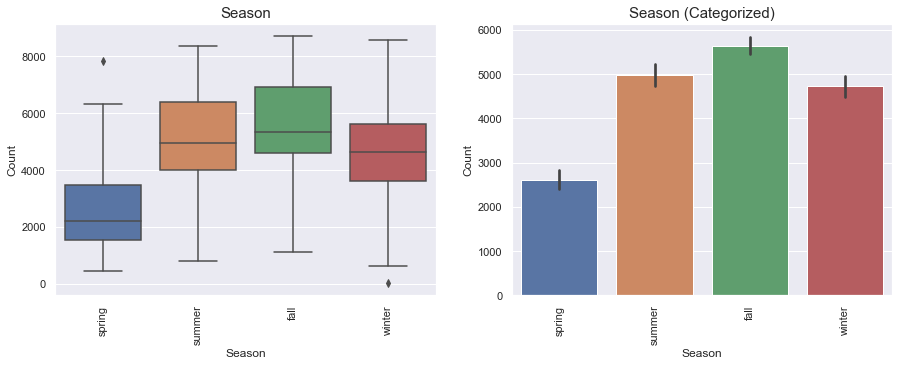

In [18]:
# Basic Statistical Details Unordered Categorical Variable: season
plt.figure(figsize=(15,5))
#Box plot
plt.subplot(1, 2, 1)
ax1=sns.boxplot(x="season", y ="cnt", data = bike_sharing_data_cleaned)
ax1.set_title('Season', fontsize=15)
ax1.set(xlabel='Season', yLabel='Count')
plt.xticks(rotation=90)

#Bar plot
plt.subplot(1, 2, 2)
ax2=sns.barplot(x="season", y ="cnt", data = bike_sharing_data_cleaned)
ax2.set_title('Season (Categorized)', fontsize=15)
ax2.set(xlabel='Season', yLabel='Count')

plt.xticks(rotation=90)
plt.show()

#### Observations:
    1. Fall has most number of bookings, the bookings are in good numbers for summer and winter as well. 

#### b. mnth

In [19]:
# Mapping season to its categories based on data dictionary provided
bike_sharing_data_cleaned['mnth'] = bike_sharing_data_cleaned['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',
                         8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

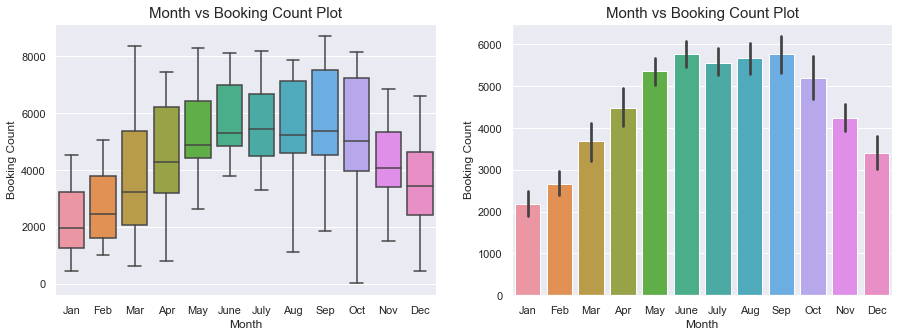

In [20]:
# Basic Statistical Details Unordered Categorical Variable: month
plt.figure(figsize=(15,5))
#Box plot
plt.subplot(1, 2, 1)
ax1=sns.boxplot(x="mnth", y ="cnt", data = bike_sharing_data_cleaned)
ax1.set_title('Month vs Booking Count Plot', fontsize=15)
ax1.set(xlabel='Month', yLabel='Booking Count')

#Bar plot
plt.subplot(1, 2, 2)
ax2=sns.barplot(x="mnth", y ="cnt", data = bike_sharing_data_cleaned)
ax2.set_title('Month vs Booking Count Plot', fontsize=15)
ax2.set(xlabel='Month', yLabel='Booking Count')

plt.show()

#### Observations:
    1. Most of the bike bookings were happening in the months 5 to 10 months with a median above 5000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

#### c. yr

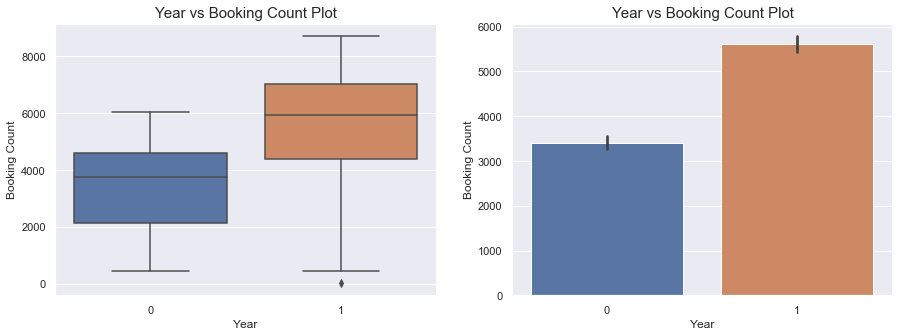

In [21]:
# Basic Statistical Details Unordered Categorical Variable: yr
plt.figure(figsize=(15,5))
#Box plot
plt.subplot(1, 2, 1)
ax1=sns.boxplot(x="yr", y ="cnt", data = bike_sharing_data_cleaned)
ax1.set_title('Year vs Booking Count Plot', fontsize=15)
ax1.set(xlabel='Year', yLabel='Booking Count')

#Bar plot
plt.subplot(1, 2, 2)
ax2=sns.barplot(x="yr", y ="cnt", data = bike_sharing_data_cleaned)
ax2.set_title('Year vs Booking Count Plot', fontsize=15)
ax2.set(xlabel='Year', yLabel='Booking Count')

plt.show()

#### Observations:
    1. Booking has increased year over year

#### d. weathersit

In [22]:
# Mapping season to its categories based on data dictionary provided
bike_sharing_data_cleaned['weathersit'] = bike_sharing_data_cleaned['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})

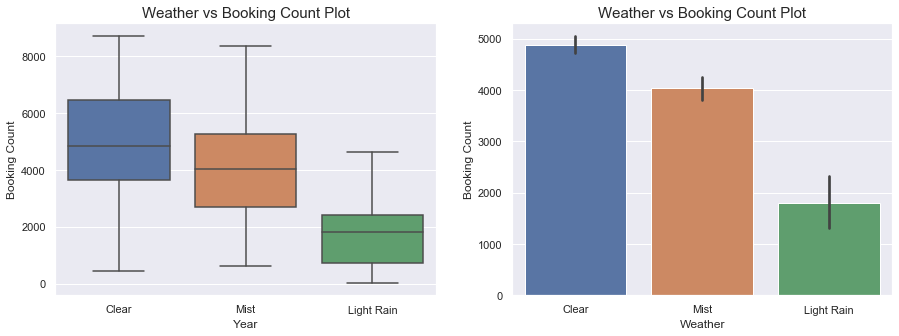

In [23]:
# Basic Statistical Details Unordered Categorical Variable: weathersit
plt.figure(figsize=(15,5))
#Box plot
plt.subplot(1, 2, 1)
ax1=sns.boxplot(x="weathersit", y ="cnt", data = bike_sharing_data_cleaned)
ax1.set_title('Weather vs Booking Count Plot', fontsize=15)
ax1.set(xlabel='Year', yLabel='Booking Count')

#Bar plot
plt.subplot(1, 2, 2)
ax2=sns.barplot(x="weathersit", y ="cnt", data = bike_sharing_data_cleaned)
ax2.set_title('Weather vs Booking Count Plot', fontsize=15)
ax2.set(xlabel='Weather', yLabel='Booking Count')

plt.show()

#### Observations:
    1. There are more bookings when the whether is clear with a median close to 5000 booking, followed by other weathersit's. This indicates, weathersit also can be a good predictor for the dependent variable.

#### e. weekday

In [24]:
# Mapping weekday to its categories based on data dictionary provided
bike_sharing_data_cleaned['weekday'] = bike_sharing_data_cleaned['weekday'].map({0:'Sunday',1:'Monday', 2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

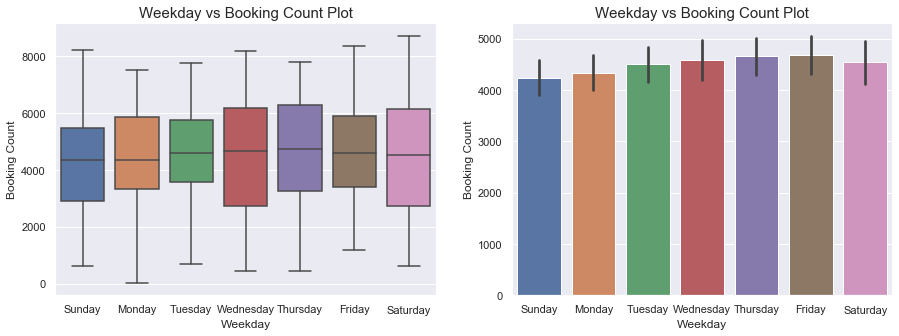

In [25]:
# Basic Statistical Details Unordered Categorical Variable: weathersit
plt.figure(figsize=(15,5))
#Box plot
plt.subplot(1, 2, 1)
ax1=sns.boxplot(x="weekday", y ="cnt", data = bike_sharing_data_cleaned)
ax1.set_title('Weekday vs Booking Count Plot', fontsize=15)
ax1.set(xlabel='Weekday', yLabel='Booking Count')

#Bar plot
plt.subplot(1, 2, 2)
ax2=sns.barplot(x="weekday", y ="cnt", data = bike_sharing_data_cleaned)
ax2.set_title('Weekday vs Booking Count Plot', fontsize=15)
ax2.set(xlabel='Weekday', yLabel='Booking Count')

plt.show()

#### f. workingday

#### Observations:
    1. There is not much difference in bookings for weekdays. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

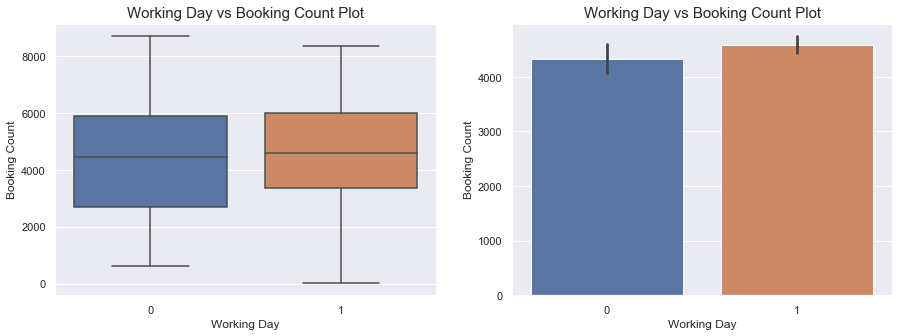

In [26]:
# Basic Statistical Details Unordered Categorical Variable: weathersit
plt.figure(figsize=(15,5))
#Box plot
plt.subplot(1, 2, 1)
ax1=sns.boxplot(x="workingday", y ="cnt", data = bike_sharing_data_cleaned)
ax1.set_title('Working Day vs Booking Count Plot', fontsize=15)
ax1.set(xlabel='Working Day', yLabel='Booking Count')

#Bar plot
plt.subplot(1, 2, 2)
ax2=sns.barplot(x="workingday", y ="cnt", data = bike_sharing_data_cleaned)
ax2.set_title('Working Day vs Booking Count Plot', fontsize=15)
ax2.set(xlabel='Working Day', yLabel='Booking Count')

plt.show()

#### Observations:
    1. Bike rental median for working/non-working days are almost close to each other

#### g. holiday

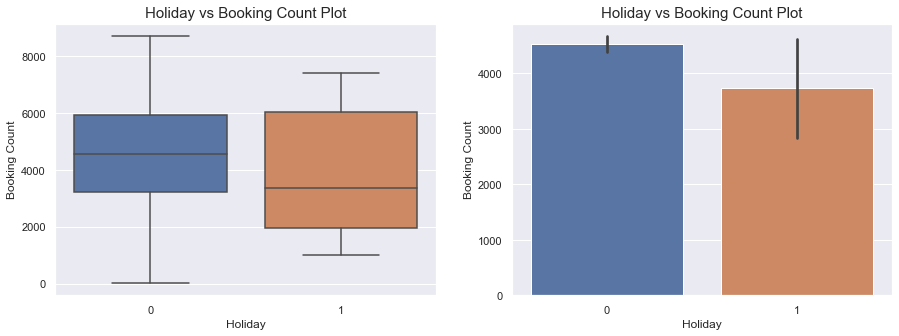

In [27]:
# Basic Statistical Details Unordered Categorical Variable: weathersit
plt.figure(figsize=(15,5))
#Box plot
plt.subplot(1, 2, 1)
ax1=sns.boxplot(x="holiday", y ="cnt", data = bike_sharing_data_cleaned)
ax1.set_title('Holiday vs Booking Count Plot', fontsize=15)
ax1.set(xlabel='Holiday', yLabel='Booking Count')

#Bar plot
plt.subplot(1, 2, 2)
ax2=sns.barplot(x="holiday", y ="cnt", data = bike_sharing_data_cleaned)
ax2.set_title('Holiday vs Booking Count Plot', fontsize=15)
ax2.set(xlabel='Holiday', yLabel='Booking Count')

plt.show()

#### Observations:
    1. Most of the bookings happen during non holiday and hence it cannot be a good predictor

#### Visializing Numerical Variables

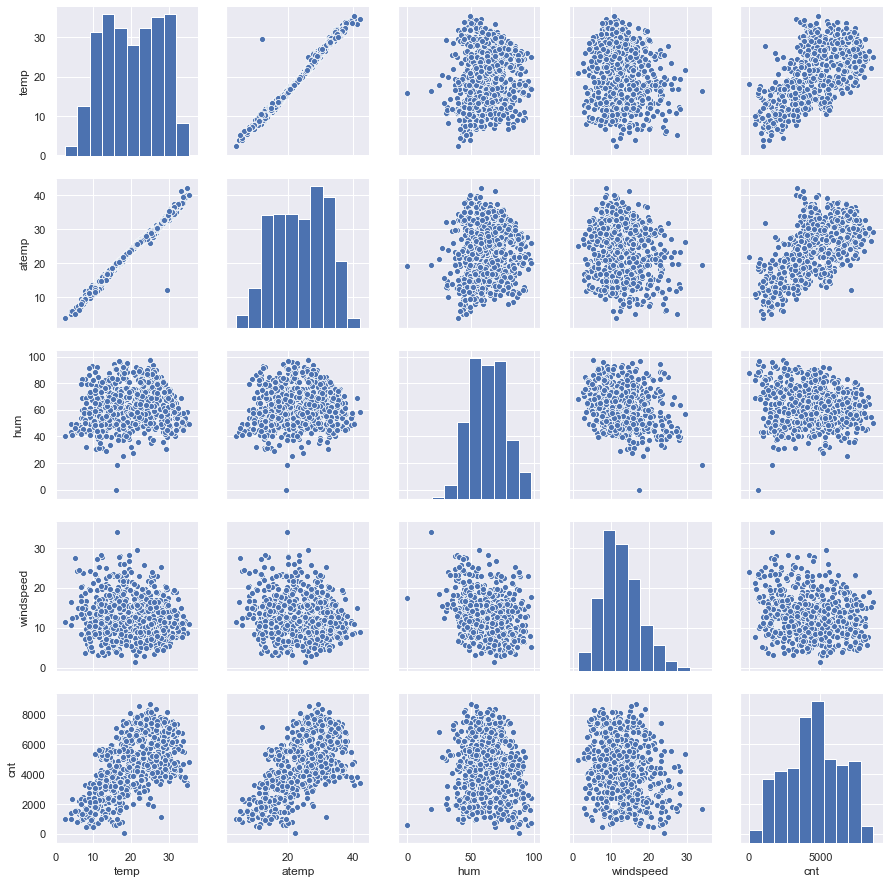

In [28]:
# Let us now make a pair plot of all the numerical variables

columns1 = ["temp", "atemp", "hum", "windspeed", "cnt"]
sns.pairplot(bike_sharing_data_cleaned[columns1])

The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt. Let's check the correlation coefficients to see which variables are highly correlated.

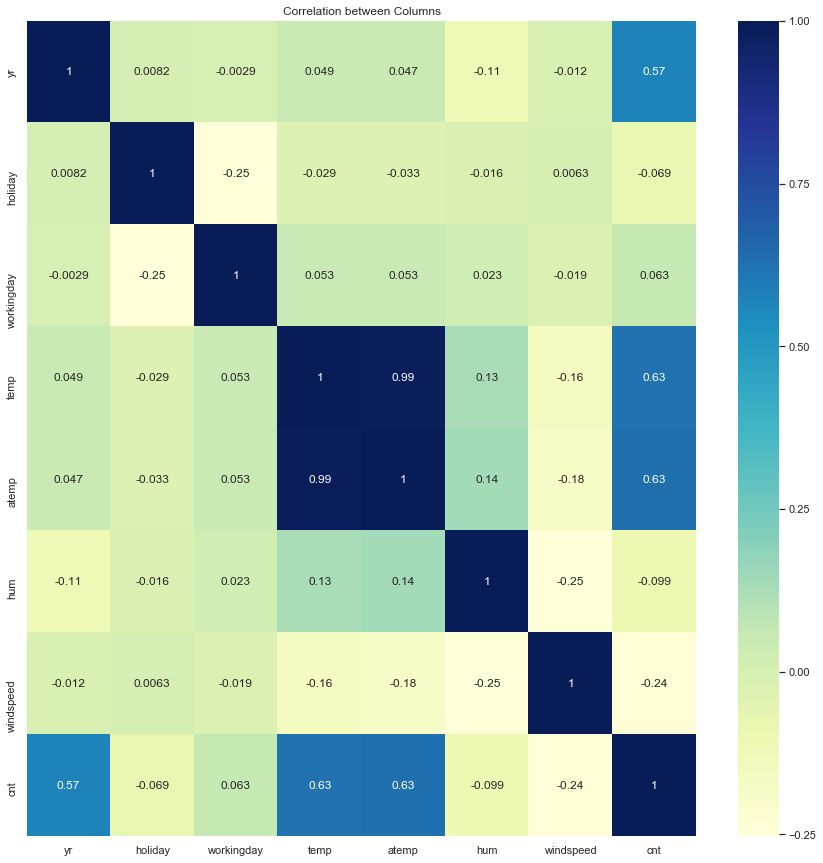

In [29]:
#plotting correlation matric on a heat map
plt.figure(figsize = (15, 15))
ax = sns.heatmap(bike_sharing_data_cleaned.corr(), annot = True, cmap="YlGnBu")
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

From the heatmap, we can see temp & atemp are highly correlated and one can be dropped to avoid multicollinearity.

In [30]:
bike_sharing_data_cleaned.drop('atemp',axis=1,inplace=True)

In [31]:
bike_sharing_data_cleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


### 5. Creating Dummy Variables

We will create dummy variables for the categorical variables 'season', 'mnth', 'weekday' & 'weathersit'.

In [32]:
print(bike_sharing_data_cleaned.shape)

(730, 11)


In [33]:
bike_sharing_data_cleaned = pd.get_dummies(bike_sharing_data_cleaned, drop_first=True)
bike_sharing_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr                       730 non-null int64
holiday                  730 non-null int64
workingday               730 non-null int64
temp                     730 non-null float64
hum                      730 non-null float64
windspeed                730 non-null float64
cnt                      730 non-null int64
season_summer            730 non-null uint8
season_fall              730 non-null uint8
season_winter            730 non-null uint8
mnth_Feb                 730 non-null uint8
mnth_Mar                 730 non-null uint8
mnth_Apr                 730 non-null uint8
mnth_May                 730 non-null uint8
mnth_June                730 non-null uint8
mnth_July                730 non-null uint8
mnth_Aug                 730 non-null uint8
mnth_Sep                 730 non-null uint8
mnth_Oct                 730 non-null uint8
mnth_Nov                 730 non-null uint8
mnth_Dec 

In [34]:
print(bike_sharing_data_cleaned.shape)

(730, 29)


### 6. Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [35]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing_data_cleaned, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
# checking shape and info of the train data set
print(df_train.shape)
print(df_train.info())

(510, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
yr                       510 non-null int64
holiday                  510 non-null int64
workingday               510 non-null int64
temp                     510 non-null float64
hum                      510 non-null float64
windspeed                510 non-null float64
cnt                      510 non-null int64
season_summer            510 non-null uint8
season_fall              510 non-null uint8
season_winter            510 non-null uint8
mnth_Feb                 510 non-null uint8
mnth_Mar                 510 non-null uint8
mnth_Apr                 510 non-null uint8
mnth_May                 510 non-null uint8
mnth_June                510 non-null uint8
mnth_July                510 non-null uint8
mnth_Aug                 510 non-null uint8
mnth_Sep                 510 non-null uint8
mnth_Oct                 510 non-null uint8
mnth_Nov                 510 non-null uint

In [37]:
# checking shape and info of the test data set
print(df_test.shape)
print(df_test.info())

(219, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
yr                       219 non-null int64
holiday                  219 non-null int64
workingday               219 non-null int64
temp                     219 non-null float64
hum                      219 non-null float64
windspeed                219 non-null float64
cnt                      219 non-null int64
season_summer            219 non-null uint8
season_fall              219 non-null uint8
season_winter            219 non-null uint8
mnth_Feb                 219 non-null uint8
mnth_Mar                 219 non-null uint8
mnth_Apr                 219 non-null uint8
mnth_May                 219 non-null uint8
mnth_June                219 non-null uint8
mnth_July                219 non-null uint8
mnth_Aug                 219 non-null uint8
mnth_Sep                 219 non-null uint8
mnth_Oct                 219 non-null uint8
mnth_Nov                 219 non-null uint

### 7. Rescaling the Features

Here we can see that temp, hum, windspeed, cnt are spread across different scales. So it is extremely important to rescale the variables so that they have a comparable scale.

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_June,mnth_July,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weathersit_Mist,weathersit_Light Rain
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


As we can see from above table, all values have been mapped between 0 and 1 where maximum value is 1 and minimum value is 0. This has been performed by MinMaxScaler().

#### Dividing into X and Y sets for the model building

In [40]:
y_train = df_train.pop('cnt')
X_train = df_train

### 8. Building a Linear Model

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

#### RFE
Recursive feature elimination

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_Feb', False, 6),
 ('mnth_Mar', False, 2),
 ('mnth_Apr', False, 4),
 ('mnth_May', False, 3),
 ('mnth_June', False, 5),
 ('mnth_July', False, 9),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', False, 11),
 ('mnth_Dec', False, 14),
 ('weekday_Monday', False, 7),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 12),
 ('weekday_Thursday', False, 13),
 ('weekday_Friday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weathersit_Mist', True, 1),
 ('weathersit_Light Rain', True, 1)]

RFE method has successfully evaluated top 15 predictors which will impact our outcome. But, we will not rely on this enitirely and continue validating this 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements.

In [44]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct', 'weekday_Saturday', 'weathersit_Mist',
       'weathersit_Light Rain'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['mnth_Feb', 'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_June',
       'mnth_July', 'mnth_Nov', 'mnth_Dec', 'weekday_Monday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday',
       'weekday_Friday'],
      dtype='object')

In [46]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### a. Model 1

In [47]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def CalculateVIF(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
  #  vif_df = vif_df.reset_index(drop=True)
    return vif


vif = CalculateVIF(X_train_rfe)
vif

,Features,VIF
3,temp,24.06
4,hum,17.47
7,season_fall,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_summer,3.44
8,season_winter,2.88
13,weathersit_Mist,2.15
0,yr,2.04
12,weekday_Saturday,1.90


In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()     # Running the linear model

In [49]:
# Check the parameters 
lr1.params

const                    0.195004
yr                       0.230066
holiday                 -0.054625
workingday               0.044634
temp                     0.495994
hum                     -0.162256
windspeed               -0.182417
season_summer            0.117478
season_fall              0.029493
season_winter            0.143048
mnth_Aug                 0.047452
mnth_Sep                 0.117784
mnth_Oct                 0.044229
weekday_Saturday         0.053306
weathersit_Mist         -0.059181
weathersit_Light Rain   -0.252340
dtype: float64

In [50]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          1.89e-191
Time:                        21:50:03   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1950      0.029      6.791      0.000       0.139       0.251
yr                        0.2301      0.008     28.776      0.000       0.214       0.246
holiday                  -0.0546      0.027     -2.033      0.043      -0.107      -0.002
workingday                0.0446      0.012      3.877      0.000       0.022       0.067
temp                      0.4960      0.034     14.803      0.000       0.430       0.562
hum                      -0.1623      0.037     -4.353      0.000      -0.235      -0.089
windspeed                -0.1824      0.025     -7.200      0.000      -0.232      -0.133
season_summer             0.1175      0.015      7.985      0.000       0.089       0.146
season_fall               0.0295      0.022      1.346      0.179      -0.014       0.073
season_winter             0.1430      0.013     10.688      0.000       0.117       0.169
mnth_Aug                  0.0475      0.017      2.745      0.006       0.013       0.081
mnth_Sep                  0.1178      0.017      6.895      0.000       0.084       0.151
mnth_Oct                  0.0442      0.017      2.565      0.011       0.010       0.078
weekday_Saturday          0.0533      0.015      3.676      0.000       0.025       0.082
weathersit_Mist          -0.0592      0.010     -5.702      0.000      -0.080      -0.039
weathersit_Light Rain    -0.2523      0.026     -9.655      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       77.307   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.274
Skew:                          -0.748   Prob(JB):                     5.94e-46
Kurtosis:                       5.751   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Since Humidity has second High VIF value, I am gooing to drop that column from model as temp is an usful feature to prdedict the model

In [51]:
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

#### b. Model 2

In [52]:
# Check for the VIF values of the feature variables. 
vif = CalculateVIF(X_train_rfe)
vif

,Features,VIF
3,temp,16.80
6,season_fall,7.78
2,workingday,4.45
4,windspeed,3.72
5,season_summer,3.40
7,season_winter,2.78
0,yr,2.04
8,mnth_Aug,1.85
11,weekday_Saturday,1.79
10,mnth_Oct,1.64


In [53]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.params
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.7
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          1.40e-188
Time:                        21:50:16   Log-Likelihood:                 510.49
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     495   BIC:                            -927.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

##### Since season_fall has the high VIF , we have decided to drop the season_fall column from the model

In [54]:
X_train_rfe = X_train_rfe.drop(["season_fall"], axis = 1)

#### c. Model 3

In [55]:
# Check for the VIF values of the feature variables. 
vif = CalculateVIF(X_train_rfe)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_winter,2.02
5,season_summer,1.82
10,weekday_Saturday,1.77
9,mnth_Oct,1.62
7,mnth_Aug,1.59
11,weathersit_Mist,1.54


In [56]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.params
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          6.16e-189
Time:                        21:50:26   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.09

 ##### Since we saw holiday column is insignificant co eff so we can drop that column

In [57]:
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)

#### d. Model 4

In [58]:
# Check for the VIF values of the feature variables. 
vif = CalculateVIF(X_train_rfe)
vif

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,season_winter,1.99
4,season_summer,1.82
9,weekday_Saturday,1.70
8,mnth_Oct,1.61
6,mnth_Aug,1.59
10,weathersit_Mist,1.54


In [59]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.params
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          2.86e-189
Time:                        21:50:35   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

##### Removing mnth_Oct based on its high p value

In [60]:
X_train_rfe = X_train_rfe.drop(["mnth_Oct"], axis = 1)

#### e. Model 5

In [61]:
# Check for the VIF values of the feature variables. 
vif = CalculateVIF(X_train_rfe)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,season_summer,1.81
8,weekday_Saturday,1.69
6,mnth_Aug,1.58
9,weathersit_Mist,1.54
5,season_winter,1.51
7,mnth_Sep,1.30


In [62]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.params
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          2.00e-189
Time:                        21:50:42   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

##### Removing mnth_Aug based on its high p value

In [63]:
X_train_rfe = X_train_rfe.drop(["mnth_Aug"], axis = 1)

#### f. Model 6

In [64]:
# Check for the VIF values of the feature variables. 
vif = CalculateVIF(X_train_rfe)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_Saturday,1.69
4,season_summer,1.57
8,weathersit_Mist,1.53
5,season_winter,1.40
6,mnth_Sep,1.20
9,weathersit_Light Rain,1.08


##### From the VIF calculation we can find that there is no multicollinearity existing between the predictor variables, as all the values are within range of below 5

In [65]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
lr6.params
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          1.47e-188
Time:                        21:50:54   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

##### This model looks good, the p-values for all the predictors seems to be significant. For now, we will consider this as our final model.

#### Interpretation of Coefficients:

temp: A coefficient value of '0.5499' indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5499 units.

weathersit_Light Rain: A coefficient value of '-0.2880' indicated that, w.r.t Weathersit_Clear, a unit increase in weathersit_Light Rain variable, decreases the bike hire numbers by 0.2880 units.

yr: A coefficient value of '0.2331' indicated that a unit increase in yr variable, increases the bike hire numbers by 0.0.2331 units.

season_winter: A coefficient value of '0.1318' indicated that w.r.t season_spring, a unit increase in season_winter variable increases the bike hire numbers by 0.1318 units.

windspeed: A coefficient value of '-0.1552' indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1552 units.

workingday: A coefficient value of '0.0563' indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.0563 units.

season_summer: A coefficient value of '0.0874' indicated that w.r.t season_spring, a unit increase in season_summer variable decreases the bike hire numbers by 0.0874 units.

mnth_Sep: A coefficient value of '0.0972' indicated that w.r.t mnth_Jan, a unit increase in mnth_Sep variable increases the bike hire numbers by 0.0972 units.

weekday_Saturday: A coefficient value of '0.0677' indicated that w.r.t weekday_Sunday, a unit increase in weekday_Saturday variable increases the bike hire numbers by 0.0677 units.

weathersit_Mist: A coefficient value of '-0.0813' indicated that, w.r.t Weathersit_Clear, a unit increase in weathersit_Mist variable, decreases the bike hire numbers by -0.0813 units.

const: The Constant value of 0.0753 indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.0753 units.

### 9. F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 254.0 Prob (F-statistic): 1.47e-188 The F-Statistics = 254 (which > 1) and the p-value = '0.0000' states that the overall model is significant


### Assumption of Residual Analysis
There is a linear relationship between X and Y. 
Error values (ε) are normally distributed for any given value of X.

Text(0.5, 0, 'Errors')

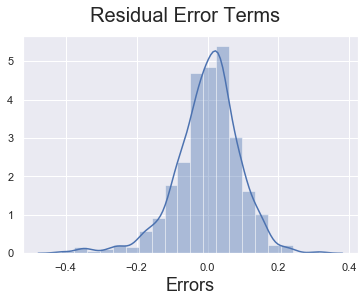

In [66]:
y_train_pred = lr6.predict(X_train_lm6)
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

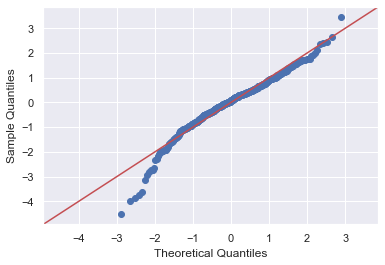

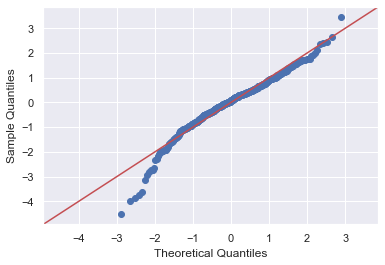

In [67]:
sm.qqplot(res, fit=True,line='45')

From the above plot we could see that the residuals are normally distributed. so our assumption is valid.

### Homoscedasticity

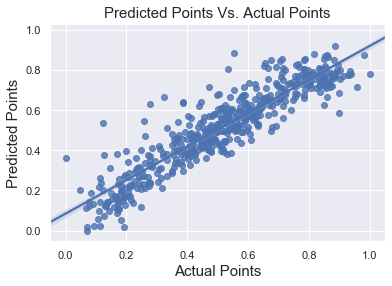

In [68]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 15})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

In the plot we can see the equal variance of residuals across the prdicted values. this proves the Homoscedasticity

### Independence of Errors

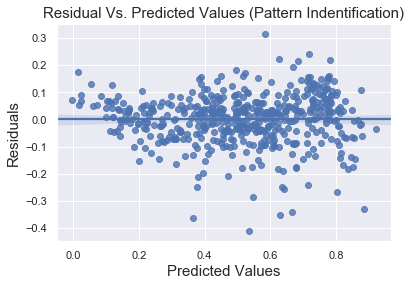

In [69]:
sns.regplot(x=y_train_pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 15})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

We see that there is almost no relation between Residual & Predicted Value.
There is no multicollinearity in the data.

In [70]:
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_Saturday,1.69
4,season_summer,1.57
8,weathersit_Mist,1.53
5,season_winter,1.40
6,mnth_Sep,1.20
9,weathersit_Light Rain,1.08


Evaluating Correlation Co-efficients/VIF values of Predictors impacting Target Variable (Individually) all the Predictors VIF values are below 5 so there is no multicollinearity in the data.

### 10. Test Data Aalysis

In [71]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_June,mnth_July,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weathersit_Mist,weathersit_Light Rain
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.911423,0.470417,0.231142,0.725421,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496221,0.777843,0.443398,0.278853,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.890387,0.236659,0.449707,0.545512,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.821739,0.070765,0.682387,0.569148,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [72]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_June,mnth_July,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,weathersit_Mist,weathersit_Light Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.508750,0.418870,0.516216,0.264840,0.246575,0.232877,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.249189,0.201253,0.188111,0.238702,0.442259,0.432005,0.423633,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.682487,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model testing

In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
yr                       219 non-null int64
holiday                  219 non-null int64
workingday               219 non-null int64
temp                     219 non-null float64
hum                      219 non-null float64
windspeed                219 non-null float64
season_summer            219 non-null uint8
season_fall              219 non-null uint8
season_winter            219 non-null uint8
mnth_Feb                 219 non-null uint8
mnth_Mar                 219 non-null uint8
mnth_Apr                 219 non-null uint8
mnth_May                 219 non-null uint8
mnth_June                219 non-null uint8
mnth_July                219 non-null uint8
mnth_Aug                 219 non-null uint8
mnth_Sep                 219 non-null uint8
mnth_Oct                 219 non-null uint8
mnth_Nov                 219 non-null uint8
mnth_Dec                 219 non-null uint8
weekday_

In [75]:
#Selecting the variables that were part of final model.
col1=X_train_rfe.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
const                    219 non-null float64
yr                       219 non-null int64
workingday               219 non-null int64
temp                     219 non-null float64
windspeed                219 non-null float64
season_summer            219 non-null uint8
season_winter            219 non-null uint8
mnth_Sep                 219 non-null uint8
weekday_Saturday         219 non-null uint8
weathersit_Mist          219 non-null uint8
weathersit_Light Rain    219 non-null uint8
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [76]:
# Making predictions using the final model (lr6)
y_pred = lr6.predict(X_test_lm6)

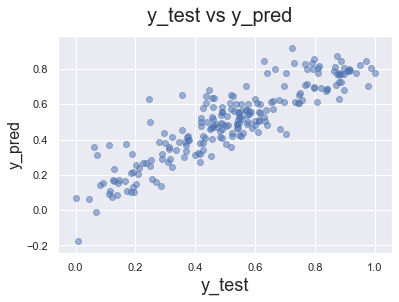

In [77]:
# Plot y_test and y_pred
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### R^2 value for test data

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7880219317877523

#### Adjusted R^2 value for test Data

In [79]:
# n is number of rows in X
R2 = 0.7880219317877523
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(((1-R2)*(n-1))/(n-p-1))
adjusted_r2

0.7778306785083173

### 11. Conclusion:
#### Result of Test and Train Data

#### Test Data
    1. R^2 value : 0.7880219317877523
    2. Adjusted R^2 values: 0.7778306785083173
#### Train Data:
    1. R^2 value : 0.836
    2. Adjusted R^2 values: 0.832
    
#### This tells us it is a good model

#### According to the final Model, the top 3 predictor variables that influences the bike booking are:
    a. temp: A coefficient value of '0.5499' indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5499 units.
    b. yr: A coefficient value of '0.2331' indicated that a unit increase in yr variable, increases the bike hire numbers by 0.0.2331 units.
    c. season_winter: A coefficient value of '0.1318' indicated that w.r.t season_spring, a unit increase in season_winter variable increases the bike hire numbers by 0.1318 units.

#### The next best features that can also be considered are
    a. season_summer: A coefficient value of '0.0874' indicated that w.r.t season_spring, a unit increase in season_summer variable decreases the bike hire numbers by 0.0874 units.
    b. weathersit_Light Rain: A coefficient value of '-0.2880' indicated that, w.r.t Weathersit_Clear, a unit increase in weathersit_Light Rain variable, decreases the bike hire numbers by 0.2880 units.
    c. windspeed: A coefficient value of '-0.1552' indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1552 units.